In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 10 ##

## Apply

In [2]:
staff = Table().with_columns(
    'Employee', make_array('Jim', 'Dwight', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
staff

Employee,Birth Year
Jim,1985
Dwight,1988
Michael,1967
Creed,1904


In [3]:
def greeting(person):
    return 'Dunder Mifflin, this is ' + person

In [4]:
greeting('Pam')

'Dunder Mifflin, this is Pam'

In [5]:
greeting('Erin')

'Dunder Mifflin, this is Erin'

In [6]:
staff.apply(greeting, 'Employee')

array(['Dunder Mifflin, this is Jim', 'Dunder Mifflin, this is Dwight',
       'Dunder Mifflin, this is Michael', 'Dunder Mifflin, this is Creed'],
      dtype='<U31')

In [7]:
def name_and_age(name, year):
    age = 2019 - year
    return name + ' is ' + str(age)

In [8]:
staff.apply(name_and_age, 'Employee', 'Birth Year')

array(['Jim is 34', 'Dwight is 31', 'Michael is 52', 'Creed is 115'],
      dtype='<U13')

## Prediction ##

In [9]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


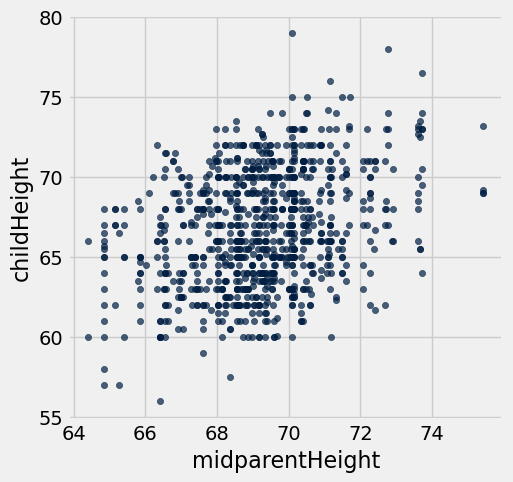

In [10]:
galton.scatter('midparentHeight', 'childHeight')

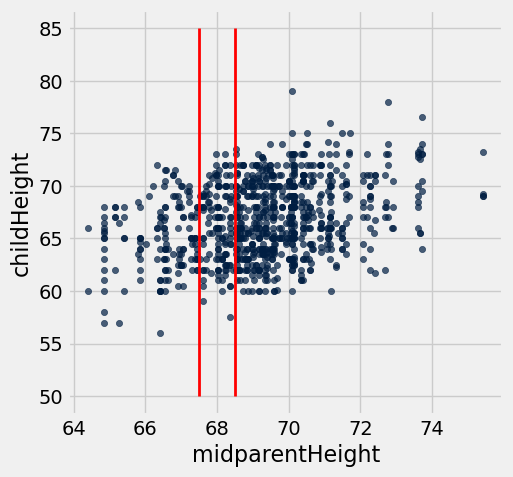

In [11]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [12]:
nearby = galton.where('midparentHeight', are.between(67.5, 68.5))
nearby_mean = nearby.column('childHeight').mean()
nearby_mean

66.24045801526718

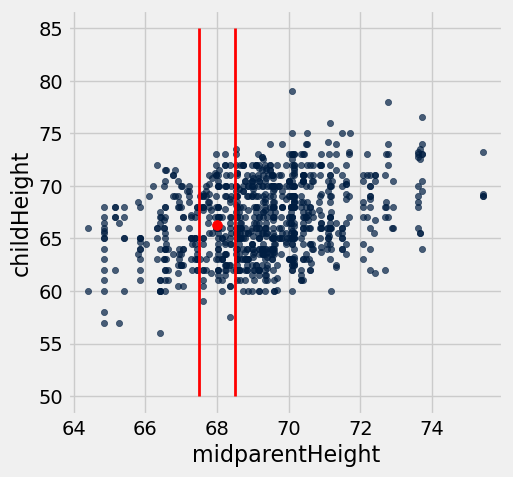

In [13]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [14]:
def predict(h):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    return nearby.column('childHeight').mean()

In [15]:
predict(68)

66.24045801526718

In [16]:
predict(70)

67.272850678733022

In [17]:
predict(73)

69.5

In [18]:
predicted_heights = galton.apply(predict, 'midparentHeight')
predicted_heights

array([ 70.1       ,  70.1       ,  70.1       ,  70.1       ,
        70.41578947,  70.41578947,  70.41578947,  70.41578947,
        68.5025    ,  68.5025    ,  68.5025    ,  68.5025    ,
        68.5025    ,  68.5025    ,  68.5025    ,  66.43149606,
        66.43149606,  66.43149606,  66.43149606,  66.43149606,
        66.43149606,  70.41578947,  70.41578947,  70.41578947,
        70.41578947,  70.41578947,  70.41578947,  70.41578947,
        69.18571429,  69.18571429,  69.18571429,  69.18571429,
        68.66052632,  67.63423913,  67.63423913,  67.63423913,
        67.63423913,  67.63423913,  67.63423913,  67.63423913,
        67.63423913,  67.37410714,  68.77428571,  68.77428571,
        68.77428571,  68.77428571,  68.59230769,  68.59230769,
        68.59230769,  68.07323944,  68.07323944,  68.07323944,
        68.07323944,  68.07323944,  68.07323944,  68.07323944,
        68.07323944,  68.07323944,  68.05465116,  68.05465116,
        68.05465116,  68.05465116,  68.05465116,  68.05

In [19]:
galton = galton.with_column('predictedHeight', predicted_heights)

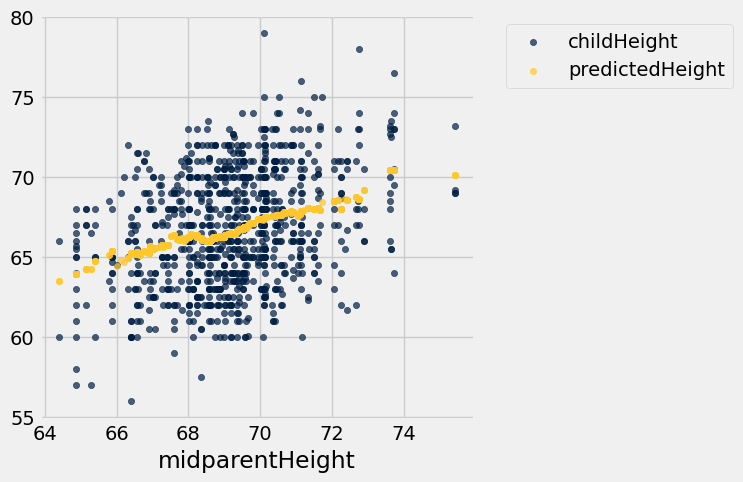

In [20]:
galton.select(
    'midparentHeight', 'childHeight', 'predictedHeight').scatter('midparentHeight')

## Prediction Accuracy ##

In [21]:
def difference(x, y):
    return x - y

In [22]:
pred_errs = galton.apply(difference, 'predictedHeight', 'childHeight')
pred_errs

array([ -3.10000000e+00,   9.00000000e-01,   1.10000000e+00,
         1.10000000e+00,  -3.08421053e+00,  -2.08421053e+00,
         4.91578947e+00,   4.91578947e+00,  -2.49750000e+00,
         5.02500000e-01,  -1.99750000e+00,   2.50000000e-03,
         1.50250000e+00,   4.00250000e+00,   5.50250000e+00,
        -5.56850394e+00,  -2.56850394e+00,  -1.56850394e+00,
        -6.85039370e-02,   3.93149606e+00,   3.93149606e+00,
         9.15789474e-01,  -6.08421053e+00,  -3.58421053e+00,
        -2.58421053e+00,  -2.58421053e+00,  -8.42105263e-02,
         6.41578947e+00,  -1.31428571e+00,   1.18571429e+00,
         3.18571429e+00,   3.18571429e+00,   3.16052632e+00,
        -6.36576087e+00,  -2.36576087e+00,  -3.65760870e-01,
         6.34239130e-01,   6.34239130e-01,   1.63423913e+00,
         4.13423913e+00,   4.63423913e+00,   2.37410714e+00,
        -2.22571429e+00,   6.77428571e+00,   7.74285714e-01,
         1.77428571e+00,  -2.40769231e+00,  -1.90769231e+00,
         1.89230769e+00,

In [23]:
galton = galton.with_column('errors',pred_errs)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight,errors
1,78.5,67,75.43,4,1,male,73.2,70.1,-3.1
1,78.5,67,75.43,4,2,female,69.2,70.1,0.9
1,78.5,67,75.43,4,3,female,69,70.1,1.1
1,78.5,67,75.43,4,4,female,69,70.1,1.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158,-3.08421
2,75.5,66.5,73.66,4,2,male,72.5,70.4158,-2.08421
2,75.5,66.5,73.66,4,3,female,65.5,70.4158,4.91579
2,75.5,66.5,73.66,4,4,female,65.5,70.4158,4.91579
3,75,64,72.06,2,1,male,71,68.5025,-2.4975
3,75,64,72.06,2,2,female,68,68.5025,0.5025


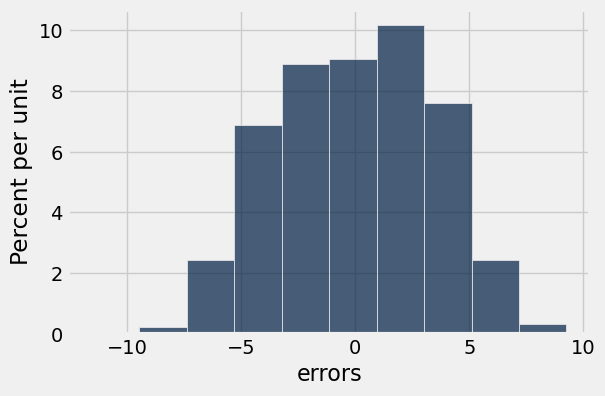

In [24]:
galton.hist('errors')

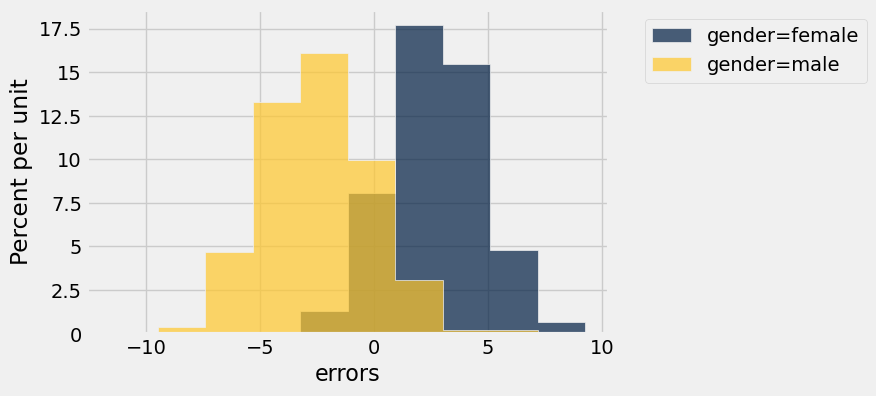

In [25]:
galton.hist('errors', group='gender')

# Discussion Question

In [26]:
def predict_smarter(h, g):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    nearby_same_gender = nearby.where('gender', g)
    return nearby_same_gender.column('childHeight').mean()

In [27]:
predict_smarter(68, 'female')

62.909259259259265

In [28]:
predict_smarter(68, 'male')

68.576623376623374

In [29]:
smarter_predicted_heights = galton.apply(predict_smarter, 'midparentHeight', 'gender')
galton = galton.with_column('smartPredictedHeight', smarter_predicted_heights)

In [30]:
smarter_pred_errs = galton.apply(difference, 'childHeight', 'smartPredictedHeight')
galton = galton.with_column('smartErrors', smarter_pred_errs)

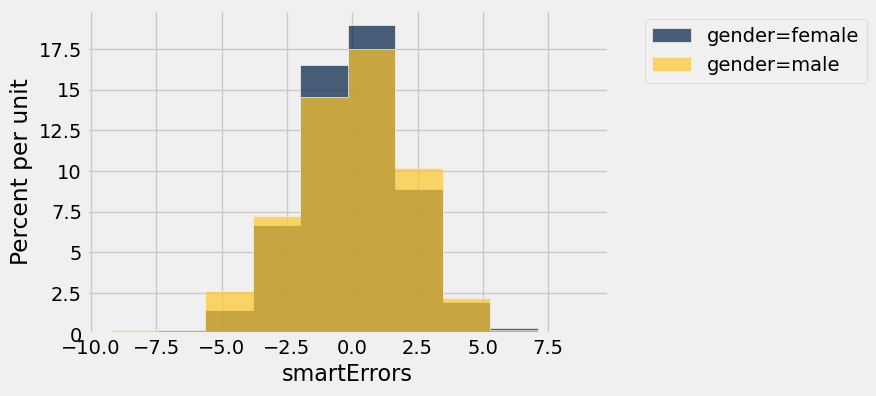

In [31]:
galton.hist('smartErrors', group='gender')

## Grouping by One Column ##

In [32]:
cones = Table.read_table('cones.csv')

In [33]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [34]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [35]:
cones.drop('Color').group('Flavor', np.average)

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


In [36]:
cones.drop('Color').group('Flavor', min)

Flavor,Price min
bubblegum,4.75
chocolate,4.75
strawberry,3.55


## Grouping By One Column: Welcome Survey ##

In [37]:
survey = Table.read_table('welcome_survey_v2.csv')

In [38]:
survey.group('Year', np.average)

Year,Extraversion average,Number of textees average,Hours of sleep average
First,5.8314,8.27326,7.12112
Fourth,5.37719,6.01754,7.13596
Fourth or above,6.33333,7.66667,7.2
Second,5.89051,7.47445,7.04623
Third,5.60837,5.71483,6.95913


In [39]:
by_extra = survey.group('Extraversion', np.average)
by_extra

Extraversion,Year average,Number of textees average,Hours of sleep average
1,,3.28571,6.61905
2,,4.1087,6.78804
3,,5.31788,7.01987
4,,6.44134,7.06145
5,,6.64398,7.08639
6,,6.53571,7.10714
7,,8.10484,7.10282
8,,9.5625,7.09375
9,,9.81429,7.09286
10,,10.7143,7.2619


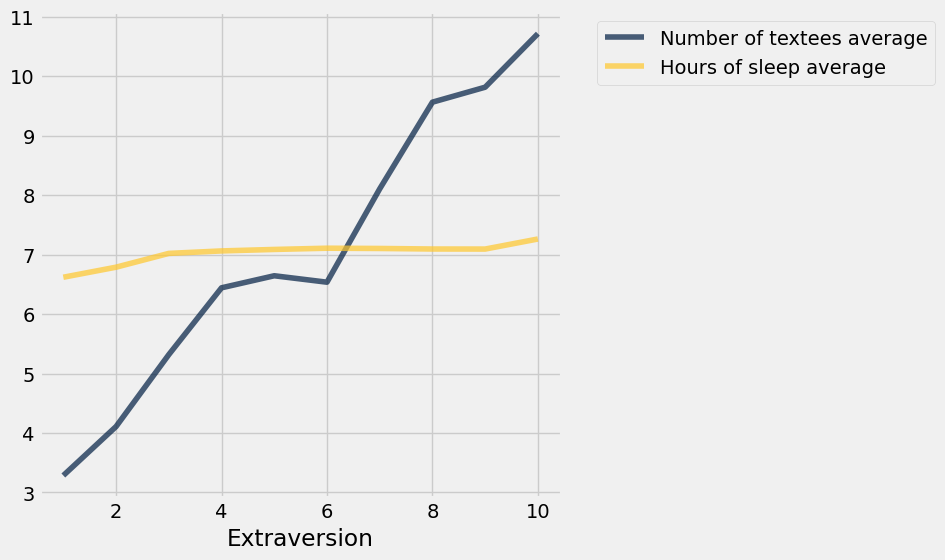

In [40]:
by_extra.select(0,2,3).plot('Extraversion') # Drop the 'Years average' column

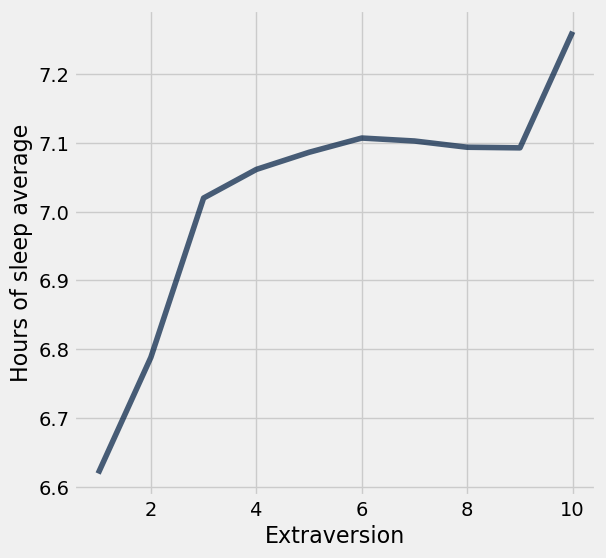

In [41]:
by_extra.select(0,3).plot('Extraversion')

## Lists

In [42]:
[1, 5, 'hello', 5.0]

[1, 5, 'hello', 5.0]

In [43]:
[1, 5, 'hello', 5.0, make_array(1,2,3)]

[1, 5, 'hello', 5.0, array([1, 2, 3], dtype=int64)]

## Grouping by Two Columns ##

In [44]:
survey = Table.read_table('welcome_survey_v3.csv')

In [45]:
survey.group(['Handedness','Sleep position']).show()

Handedness,Sleep position,count
Both,On your back,4
Both,On your left side,5
Both,On your right side,7
Both,On your stomach,1
Left-handed,On your back,31
Left-handed,On your left side,27
Left-handed,On your right side,30
Left-handed,On your stomach,12
Right-handed,On your back,268
Right-handed,On your left side,344


## Pivot Tables

In [46]:
survey.pivot('Sleep position', 'Handedness')

Handedness,On your back,On your left side,On your right side,On your stomach
Both,4,5,7,1
Left-handed,31,27,30,12
Right-handed,268,344,398,199


In [47]:
survey.pivot('Sleep position', 'Handedness', values='Extraversion', collect=np.average)

Handedness,On your back,On your left side,On your right side,On your stomach
Both,7,5.8,5.28571,8
Left-handed,5.45161,5.33333,5.56667,6.75
Right-handed,5.57836,5.70349,5.93467,5.90452


In [48]:
survey.group('Handedness', np.average)

Handedness,Year average,Extraversion average,Number of textees average,Hours of sleep average,Sleep position average
Both,,6,7.64706,6.79412,
Left-handed,,5.61,6.88,7.0475,
Right-handed,,5.78495,7.34243,7.0761,
